##### About LSTM (Long Short Term Memory)

    Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.

    This is a behavior required in complex problem domains like machine translation, speech recognition, and more.

    LSTMs are a complex area of deep learning. It can be hard to get your hands around what LSTMs are, and how terms like bidirectional and sequence-to-sequence relate to the field.

    In this post, you will get insight into LSTMs using the words of research scientists that developed the methods and applied them to new and important problems.

    There are few that are better at clearly and precisely articulating both the promise of LSTMs and how they work than the experts that developed them.

##### About Keras

    Keras is a high-level neural networks API that simplifies the process of building and training deep learning models. Integrated with TensorFlow 2.x as tf.keras, it offers a user-friendly, modular interface for designing and implementing models. Keras supports quick prototyping with pre-built models and custom layers, and it provides utilities for handling and preprocessing data. Its ease of use and flexibility make it ideal for both beginners and experienced practitioners working on various machine learning tasks.

##### Importing require Libraries.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# train stock is used to train the model.
train_stock = pd.read_csv('Google_Stock_Price_Train.csv')

# test stock is used to test the model.
test_stock = pd.read_csv('Google_Stock_Price_Test.csv')

In [3]:
train_stock.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


    About the DataSet 
        Date: The specific trading day for which the data is recorded. This column 
              helps in tracking the performance of the stock over time.

        Open: The price at which the stock first traded upon the opening of the market 
              on a given day. It indicates the initial trading price.

        High: The highest price at which the stock traded during the day. This value shows 
              the peak trading price within the given day.

        Low: The lowest price at which the stock traded during the day. This value indicates 
              the bottom trading price for the day.

        Close: The price at which the stock last traded upon the close of the market on a given day. 
              This is often used to analyze the stock’s performance and trends.

        Volume: The total number of shares traded during the day. It indicates the level of activity 
              or liquidity in the stock.

In [4]:
# print(train_stock.shape)
print(f"There are {train_stock.shape[1]} Columns and {train_stock.shape[0]} Rows in the Training dataset")
print(f"There are {test_stock.shape[1]} Columns and {test_stock.shape[0]} Rows in the Testing dataset")

There are 6 Columns and 1258 Rows in the Training dataset
There are 6 Columns and 20 Rows in the Testing dataset


In [5]:
prev_data = train_stock.tail(80)

In [6]:
prev_data

,Date,Open,High,Low,Close,Volume
1178,09-08-2016,778.59,780.35,773.58,775.32,"12,70,300"
1179,09-09-2016,770.10,773.24,759.66,759.66,"18,85,500"
1180,09-12-2016,755.13,770.29,754.00,769.02,"13,11,000"
1181,9/13/2016,764.48,766.22,755.80,759.69,"13,95,000"
1182,9/14/2016,759.61,767.68,759.11,762.49,"10,87,400"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"6,23,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"7,89,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"11,53,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"7,44,300"


In [7]:
train_stock.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [8]:
train_stock.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [9]:
train_stock['Date'].describe()

count           1258
unique          1258
top       01-03-2012
freq               1
Name: Date, dtype: object

In [10]:
train_stock['Date'] = train_stock['Date'].apply(lambda x: pd.to_datetime(x, errors = 'coerce') if x != 'O' else pd.NaT)

In [11]:
train_stock['Date'].value_counts()

Date
2012-01-03    1
2015-04-30    1
2015-05-11    1
2015-05-08    1
2015-05-07    1
             ..
2013-09-04    1
2013-09-03    1
2013-08-30    1
2013-08-29    1
2016-12-30    1
Name: count, Length: 1258, dtype: int64

In [12]:
train_stock[['High', 'Low']].describe().T

,count,mean,std,min,25%,50%,75%,max
High,1258.0,537.880223,153.008811,281.21,406.765,540.75,662.5875,816.68
Low,1258.0,529.007409,150.552807,277.22,401.765,532.99,644.8000,805.14


In [13]:
# Conversion
train_stock['Close'] = pd.to_numeric(train_stock['Close'], errors='coerce')

In [14]:
# Removing , from str value to from Numeric
train_stock['Volume'] = train_stock['Volume'].astype(str).replace(',', '', regex=True)

# Conversion og Object to float
train_stock['Volume'] = pd.to_numeric(train_stock['Volume'], errors='coerce')

In [15]:
train_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

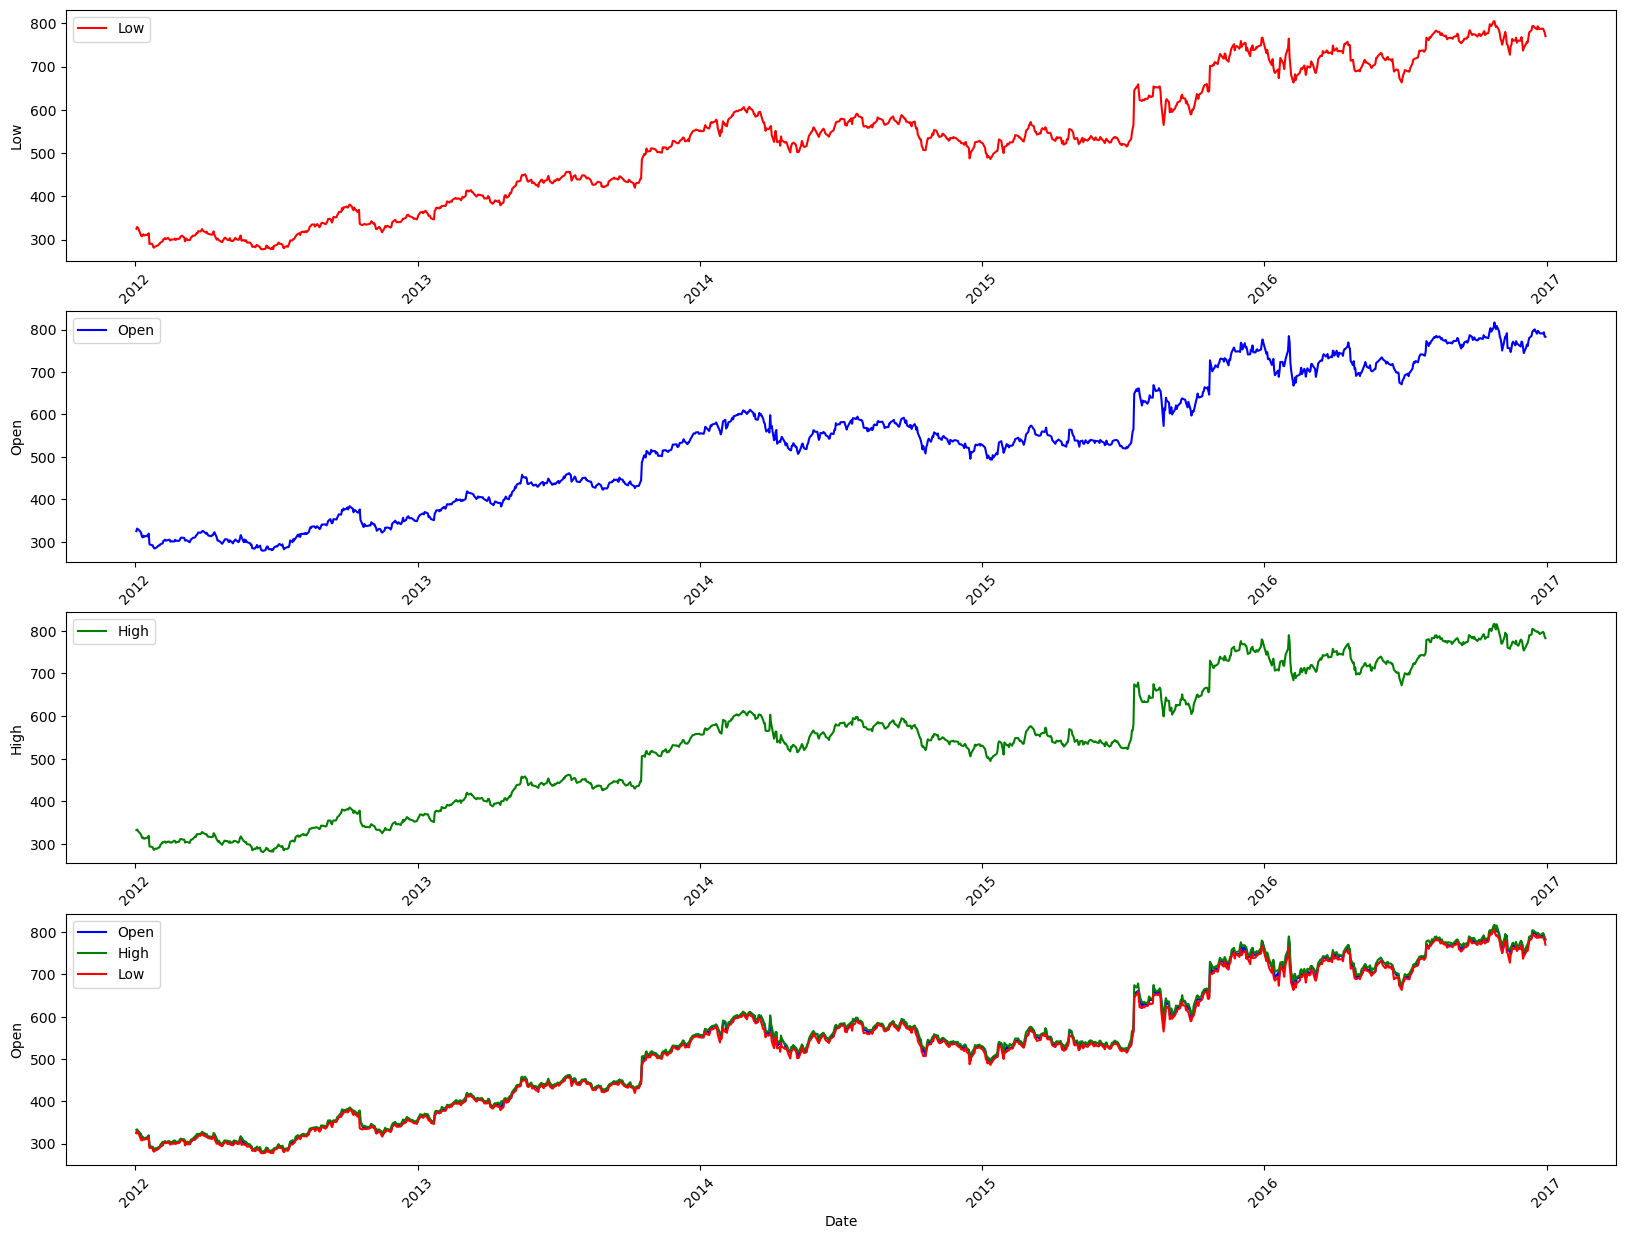

In [16]:
plt.figure(figsize = (20,15))
plt.subplot(4, 1, 1)
sns.lineplot(x = train_stock["Date"], y = train_stock["Low"], label = 'Low', color = 'red')
plt.xticks(rotation = 45)
plt.subplot(4, 1, 2)
sns.lineplot(x = train_stock["Date"], y = train_stock["Open"], label = 'Open', color = 'blue')
plt.xticks(rotation = 45)
plt.subplot(4, 1, 3)
sns.lineplot(x = train_stock["Date"], y = train_stock["High"], label = 'High', color = 'green')
plt.xticks(rotation = 45)
plt.subplot(4, 1, 4)
sns.lineplot(x = train_stock["Date"], y = train_stock["Open"], label = 'Open', color = 'blue')
sns.lineplot(x = train_stock["Date"], y = train_stock["High"], label = 'High', color = 'green')
sns.lineplot(x = train_stock["Date"], y = train_stock["Low"], label = 'Low', color = 'red')
plt.xticks(rotation = 45)
plt.show()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


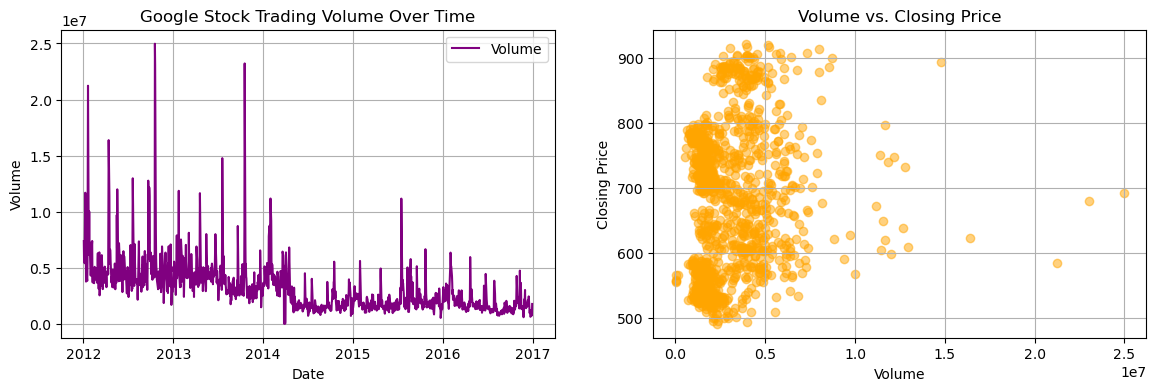

In [17]:
if 'Date' not in train_stock.columns:
    train_stock = train_stock.reset_index()

# Check column names
print(train_stock.columns)

# Convert 'Date' column to datetime if necessary
if not pd.api.types.is_datetime64_any_dtype(train_stock['Date']):
    train_stock['Date'] = pd.to_datetime(train_stock['Date'])
plt.figure(figsize = [14, 4])
plt.subplot(1, 2, 1)
plt.plot(train_stock['Date'], train_stock['Volume'], label='Volume', color='purple')
plt.title('Google Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)

# Plot Volume vs. Close price
plt.subplot(1, 2, 2)
plt.scatter(train_stock['Volume'], train_stock['Close'], color='orange', alpha=0.5)
plt.title('Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

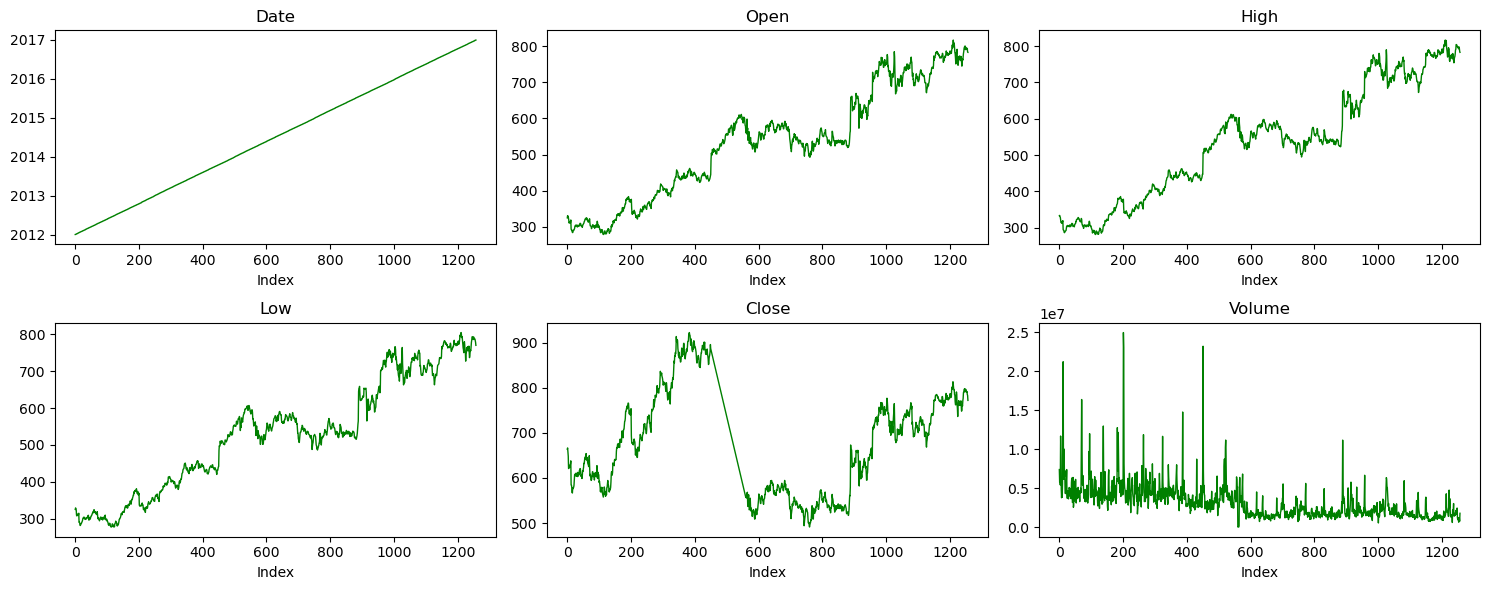

In [18]:
plt.figure(figsize = [15, 6])  # Adjusting the figure size for 2 rows and 3 columns

# Iterate through columns and create subplots
for i, col in enumerate(train_stock.columns, 1):  # Update dataset to 'train_stock'
    plt.subplot(2, 3, i)  # Create subplots with 2 rows and 3 columns
    sns.lineplot(data=train_stock, y=col, x=train_stock.index, color='green', linewidth=1)  # Set green color and thin line
    plt.title(col)  # Set title for each subplot
    plt.ylabel('')  # Hide y-axis label
    plt.xlabel('Index')  # Label x-axis as Index

plt.tight_layout()  # Adjust subplots to fit in figure area
plt.show()


In [19]:
train_stock.loc[550 : 600, :]

,Date,Open,High,Low,Close,Volume
550,2014-03-13,601.72,602.99,590.17,NaN,4708600
551,2014-03-14,588.79,593.21,584.08,NaN,4604900
552,2014-03-17,587.42,596.30,586.86,NaN,4340300
553,2014-03-18,595.10,603.50,594.30,NaN,3643500
554,2014-03-19,603.64,603.73,594.97,NaN,3237800
555,2014-03-20,597.73,602.55,595.45,NaN,3381900
556,2014-03-21,600.90,602.56,589.02,NaN,6441000
557,2014-03-24,589.88,590.24,570.84,NaN,6096800
558,2014-03-25,580.82,582.74,571.36,NaN,4838400
559,2014-03-26,578.84,583.60,563.64,NaN,5179200


In [20]:
train_stock = train_stock.iloc[561:]

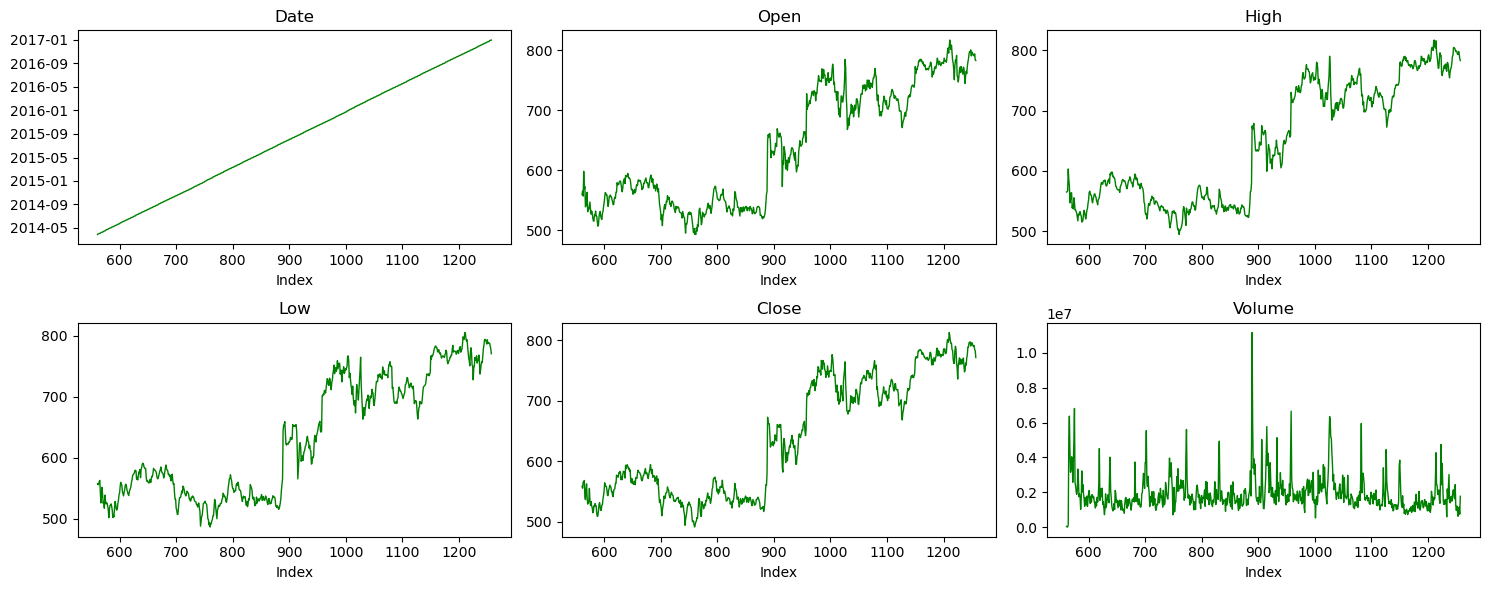

In [21]:
plt.figure(figsize = [15, 6])  # Adjusting the figure size for 2 rows and 3 columns

# Iterate through columns and create subplots
for i, col in enumerate(train_stock.columns, 1):  # Update dataset to 'train_stock'
    plt.subplot(2, 3, i)  # Create subplots with 2 rows and 3 columns
    sns.lineplot(data=train_stock, y=col, x=train_stock.index, color='green', linewidth=1)  # Set green color and thin line
    plt.title(col)  # Set title for each subplot
    plt.ylabel('')  # Hide y-axis label
    plt.xlabel('Index')  # Label x-axis as Index

plt.tight_layout()  # Adjust subplots to fit in figure area
plt.show()


In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [23]:
train_stock.set_index('Date', inplace = True)
train_stock.sort_index(inplace = True)

In [24]:
train_stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-03-28,559.66,564.88,557.14,558.46,41200
2014-03-31,565.34,565.45,555.41,555.45,10800
2014-04-01,557.18,566.89,557.18,565.61,7900
2014-04-02,598.35,603.17,560.65,565.45,147100
2014-04-03,568.29,585.67,562.59,568.18,5099100


In [25]:
scaler = MinMaxScaler()
train_stock = scaler.fit_transform(train_stock)
train_stock

array([[2.05207496e-01, 2.18158107e-01, 2.22351134e-01, 2.08940387e-01,
        2.98467330e-03],
       [2.22771971e-01, 2.19927964e-01, 2.16926406e-01, 1.99589948e-01,
        2.59926504e-04],
       [1.97538500e-01, 2.24399180e-01, 2.22476561e-01, 2.31151564e-01,
        0.00000000e+00],
       ...,
       [9.28938091e-01, 9.30292492e-01, 9.31203161e-01, 9.12832779e-01,
        1.02706821e-01],
       [8.96870555e-01, 9.04520897e-01, 9.17782446e-01, 9.05812184e-01,
        6.60034059e-02],
       [8.95076999e-01, 8.94740111e-01, 8.91097802e-01, 8.71734336e-01,
        1.57936721e-01]])

In [26]:
x_train = []
y_train = []

In [27]:
train_stock.shape[0]

697

In [28]:
time_stemp = 5
for i in range (time_stemp,train_stock.shape[0]):
    x_train.append(train_stock[i - time_stemp:i])
    y_train.append(train_stock[i,0])

In [29]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [30]:
x_train.shape,y_train.shape

((692, 5, 5), (692,))

In [31]:
x_train.shape[1],5

(5, 5)

In [32]:
model = Sequential()
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],5)))
model.add(Dropout(0.2))

model.add(LSTM(units = 70, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 80)               │          27,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 80)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 5, 70)               │          42,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 70)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 5, 60)               │          31,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 60)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          22,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,491 (482.39 KB)

 Trainable params: 123,491 (482.39 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error')

In [35]:
model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.2593
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0459
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0225
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0142
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0158
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0086
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0070
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0086
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0071
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0067
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0070
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0083
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - lo

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0036
Epoch 82/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0030
Epoch 83/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0040
Epoch 84/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0035
Epoch 85/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0037
Epoch 86/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0031
Epoch 87/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0034
Epoch 88/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0032
Epoch 89/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0033
Epoch 90/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0031
Epoch 91/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0036
Epoch 92/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0033
Epoch 93/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0037
Epoch 94/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0036
Epoch 95/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 

In [36]:
prev_data.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"6,23,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"7,89,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"11,53,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"7,44,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"17,70,000"


In [37]:
test_stock = pd.concat([prev_data, test_stock], axis = 0)
test_stock.shape

(100, 6)

In [38]:
test_stock['Date'] = test_stock['Date'].apply(lambda x: pd.to_datetime(x, errors='coerce') if x != 'O' else pd.NaT)

In [39]:
# Conversion
test_stock['Close'] = pd.to_numeric(test_stock['Close'], errors='coerce')

# Removing , from str value to from Numeric
test_stock['Volume'] = test_stock['Volume'].astype(str).replace(',', '', regex=True)
# Conversion og Object to float
test_stock['Volume'] = pd.to_numeric(test_stock['Volume'], errors='coerce')

In [40]:
test_stock.set_index('Date', inplace = True)
test_stock.sort_index(inplace = True)

In [41]:
test_stock.describe()

,Open,High,Low,Close,Volume
count,100.00000,100.000000,100.000000,100.00000,1.000000e+02
mean,784.39790,789.542000,778.396900,783.85930,1.651108e+06
std,19.09251,18.100471,19.368404,18.88226,7.087101e+05
min,744.59000,754.000000,727.540000,736.08000,5.874000e+05
25%,771.49000,775.802500,764.387500,770.43000,1.208825e+06
50%,782.19500,789.155000,775.935000,783.34000,1.476200e+06
75%,796.98000,803.122500,793.007500,796.51250,1.875675e+06
max,837.81000,841.950000,827.010000,835.67000,4.745200e+06


In [42]:
input_ = scaler.fit_transform(test_stock)
input_

array([[0.3647286 , 0.29960205, 0.46285312, 0.39401546, 0.16424551],
       [0.27365372, 0.21876066, 0.32291143, 0.23677076, 0.31220838],
       [0.11306587, 0.18521887, 0.26600985, 0.3307561 , 0.17403435],
       [0.21336623, 0.13894258, 0.28410576, 0.237072  , 0.19423734],
       [0.16112422, 0.15554292, 0.31738213, 0.26518727, 0.1202559 ],
       [0.1963098 , 0.22512791, 0.32592742, 0.3582689 , 0.17261533],
       [0.26989916, 0.17907902, 0.37317784, 0.32935034, 0.35160421],
       [0.29854109, 0.22740193, 0.37096612, 0.29741942, 0.14079561],
       [0.26185368, 0.21978397, 0.41208405, 0.35475449, 0.09408822],
       [0.30111564, 0.26333144, 0.40977179, 0.40305252, 0.13959305],
       [0.37985411, 0.40761796, 0.51171207, 0.51340496, 0.21617201],
       [0.45054709, 0.39715748, 0.56911632, 0.5102922 , 0.19830199],
       [0.40924694, 0.32677658, 0.45772595, 0.38286977, 0.22747607],
       [0.33158121, 0.36372939, 0.47019202, 0.47123205, 0.13608158],
       [0.35679039, 0.31620239, 0.

In [43]:
x_test = []
y_test = []

for i in range(time_stemp,input_.shape[0]):
    x_test.append(input_[i-time_stemp:i])
    y_test.append(input_[i,0])

In [44]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape,y_test.shape

((95, 5, 5), (95,))

In [45]:
y_test

array([0.1963098 , 0.26989916, 0.29854109, 0.26185368, 0.30111564,
       0.37985411, 0.45054709, 0.40924694, 0.33158121, 0.35679039,
       0.39530144, 0.34048487, 0.31817207, 0.33726668, 0.37245226,
       0.3691268 , 0.37620682, 0.35528856, 0.451298  , 0.4201888 ,
       0.39294143, 0.39755417, 0.37770865, 0.46406351, 0.57552027,
       0.62980047, 0.54076378, 0.64696417, 0.7733319 , 0.6624115 ,
       0.60512766, 0.6839734 , 0.54580562, 0.41085604, 0.36054495,
       0.24308088, 0.06511478, 0.32085389, 0.41632697, 0.37921047,
       0.49967818, 0.12819138, 0.1181077 , 0.025531  , 0.11381678,
       0.23954087, 0.28727741, 0.19330616, 0.30079382, 0.24822999,
       0.21100622, 0.16530787, 0.28899378, 0.2733319 , 0.13784596,
       0.        , 0.14074233, 0.21604806, 0.17603519, 0.29918472,
       0.37985411, 0.43391976, 0.52896374, 0.56650933, 0.56586569,
       0.59869127, 0.48948723, 0.55964385, 0.54977473, 0.51244368,
       0.49678181, 0.4944218 , 0.52681828, 0.41557606, 0.40935

In [46]:
y_pred = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 419ms/step


array([[0.18928756],
       [0.21775436],
       [0.27487832],
       [0.2829265 ],
       [0.27693862],
       [0.29268888],
       [0.3280685 ],
       [0.35990262],
       [0.36341336],
       [0.36389077],
       [0.37995732],
       [0.3702445 ],
       [0.35088313],
       [0.33393776],
       [0.31195146],
       [0.3315881 ],
       [0.33873302],
       [0.3215369 ],
       [0.3465052 ],
       [0.38250393],
       [0.39768875],
       [0.3858648 ],
       [0.37459826],
       [0.3814997 ],
       [0.4182948 ],
       [0.4507485 ],
       [0.5111827 ],
       [0.5461853 ],
       [0.6134357 ],
       [0.6426162 ],
       [0.60853475],
       [0.57493854],
       [0.56662995],
       [0.5246435 ],
       [0.42279744],
       [0.35108328],
       [0.2685174 ],
       [0.2182019 ],
       [0.2606607 ],
       [0.3532223 ],
       [0.42922252],
       [0.38312984],
       [0.26683208],
       [0.13129093],
       [0.08888144],
       [0.11903225],
       [0.21657611],
       [0.297

In [47]:
scaler.scale_

array([1.07273117e-02, 1.13700966e-02, 1.00532824e-02, 1.00411688e-02,
       2.40511809e-07])

In [48]:
scale = 1 / 1.07273117e-02

y_pred = y_pred * scale
y_test = y_test * scale

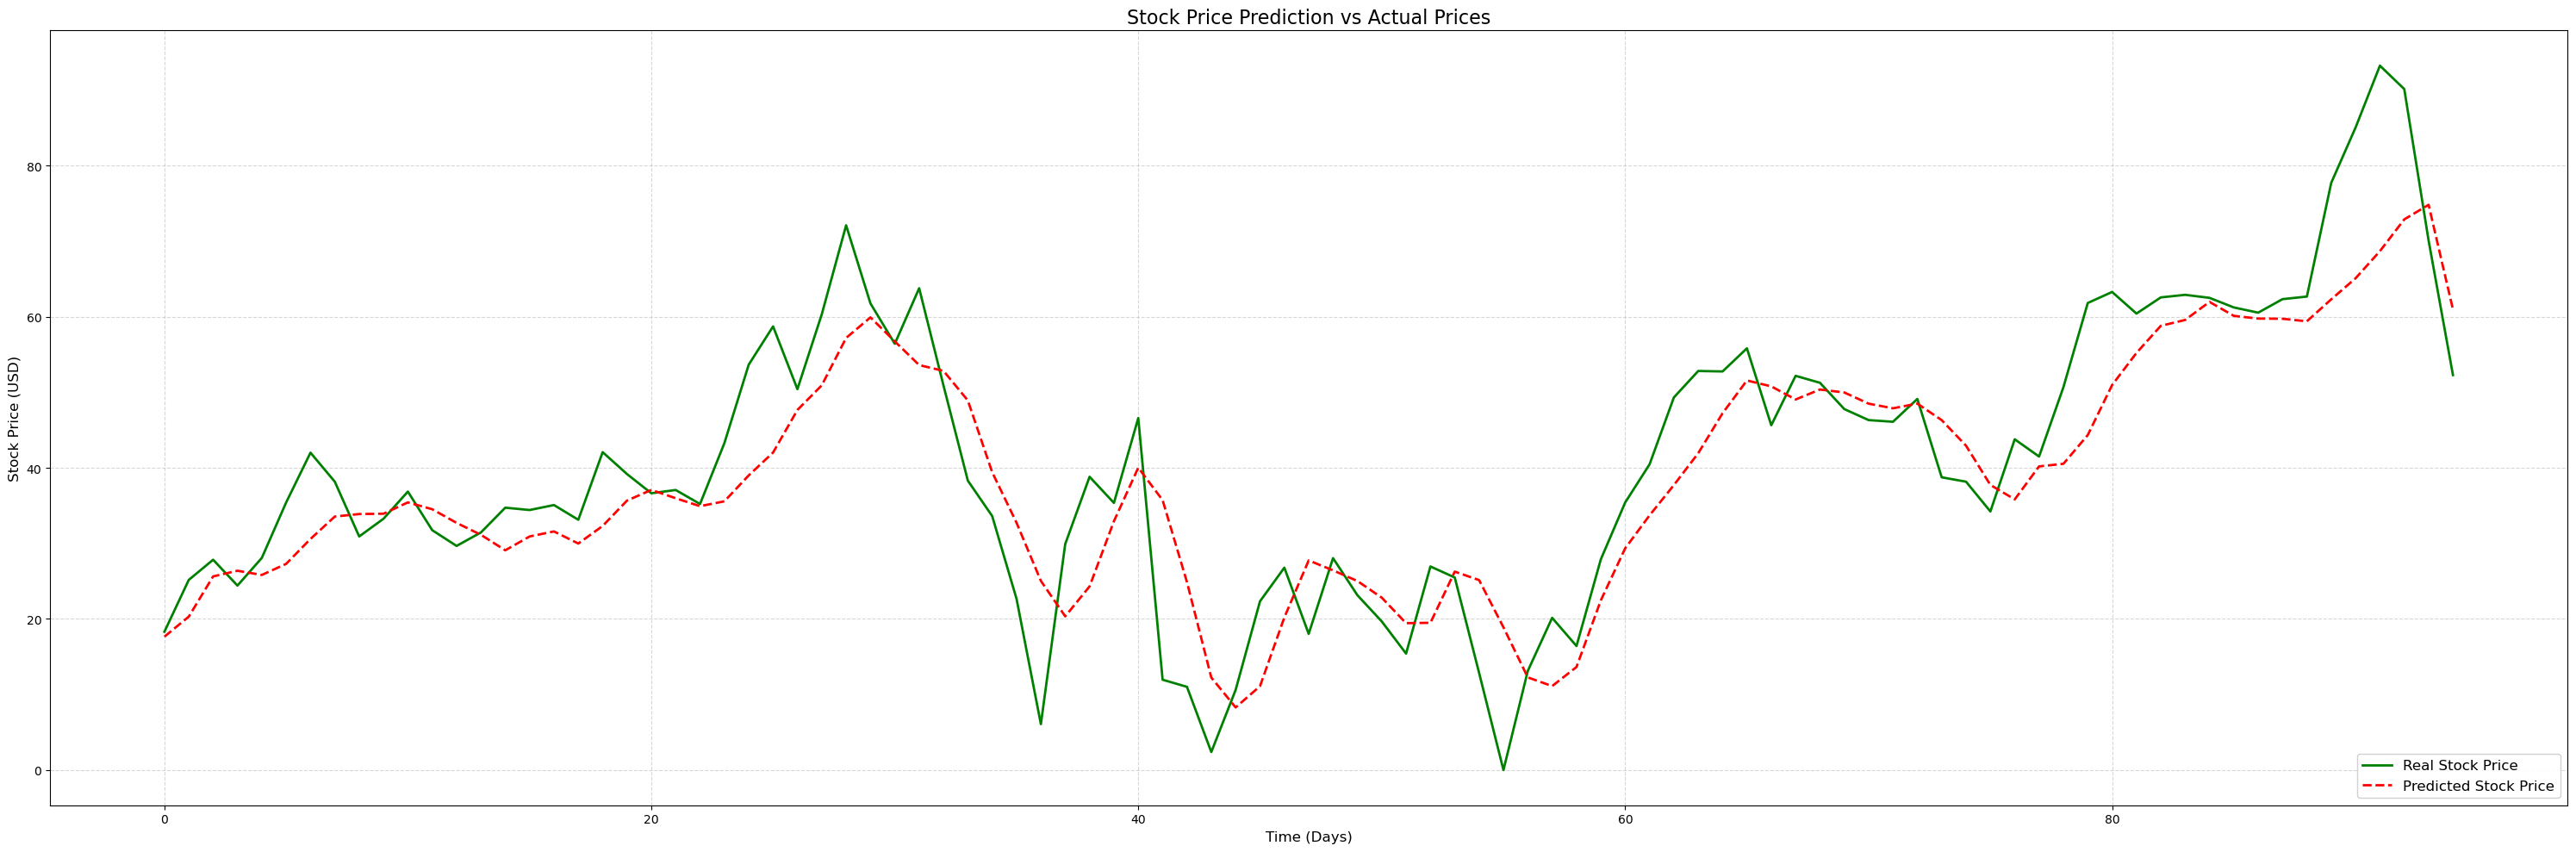

In [57]:
plt.figure(figsize = [30, 10])

plt.plot(y_test, color='green', label='Real Stock Price', linewidth=2)

plt.plot(y_pred, color='red', label='Predicted Stock Price', linestyle='--', linewidth=2)
plt.title('Stock Price Prediction vs Actual Prices', fontsize=16)
plt.xlabel('Time (Days)', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right', fontsize=12, framealpha=0.9)
plt.tight_layout()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_sc = r2_score(y_test, y_pred)

In [63]:
print(f"Mean square error : {mse}")
print(f"Mean Absolute error : {mae}")
print(f"R2 Score : {r2_sc}")

Mean square error : 74.6823019081922
Mean Absolute error : 6.52423197118816
R2 Score : 0.790643940550937
